# PROJECT TITLE: Online Payments Fraud Detection


# Load and Explore the dataset

In [424]:
# import the necessary libraries for data analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [425]:
# Load the data set - ONLNE PAYMENTS FRAUD DETECTION.CSV
Data = pd.read_csv("/content/Online Payments Fraud Detection1.csv")
Data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9003,7,PAYMENT,2361.09,C940364390,513070.97,510709.88,M1262973217,0.0,0.0,0,0
9004,7,PAYMENT,180.45,C567632329,510709.88,510529.43,M1965969606,0.0,0.0,0,0
9005,7,PAYMENT,5955.29,C737096679,510529.43,504574.13,M1540460994,0.0,0.0,0,0
9006,7,PAYMENT,3549.07,C1367369816,504574.13,501025.06,M1454357198,0.0,0.0,0,0


In [426]:
Data = Data.drop('isFlaggedFraud', axis=1)

In [427]:
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [428]:
Data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
9003,7,PAYMENT,2361.09,C940364390,513070.97,510709.88,M1262973217,0.0,0.0,0
9004,7,PAYMENT,180.45,C567632329,510709.88,510529.43,M1965969606,0.0,0.0,0
9005,7,PAYMENT,5955.29,C737096679,510529.43,504574.13,M1540460994,0.0,0.0,0
9006,7,PAYMENT,3549.07,C1367369816,504574.13,501025.06,M1454357198,0.0,0.0,0
9007,7,PAYMENT,10837.97,C68013047,501025.06,490187.09,M1401226549,0.0,0.0,0


In [429]:
Data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,9008,9008,9008,9008,9008,9008,9008
mean,3,102304,927332,949405,946589,1114876,0
std,2,266274,2186367,2231973,2692319,3048598,0
min,1,2,0,0,0,0,0
25%,1,4348,198,0,0,0,0
50%,4,12964,21901,11595,0,0,0
75%,6,114272,195451,195224,290000,247063,0
max,7,10000000,12900000,13000000,19500000,19200000,1


In [430]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            9008 non-null   int64  
 1   type            9008 non-null   object 
 2   amount          9008 non-null   float64
 3   nameOrig        9008 non-null   object 
 4   oldbalanceOrg   9008 non-null   float64
 5   newbalanceOrig  9008 non-null   float64
 6   nameDest        9008 non-null   object 
 7   oldbalanceDest  9008 non-null   float64
 8   newbalanceDest  9008 non-null   float64
 9   isFraud         9008 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 703.9+ KB


# Handling Missing values & Extraction of value

In [431]:
Data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [432]:
Data.isnull().any()

,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,False
newbalanceOrig,False
nameDest,False
oldbalanceDest,False
newbalanceDest,False
isFraud,False


In [433]:
print(Data.type.value_counts())

type
PAYMENT     4883
CASH_IN     1786
CASH_OUT    1194
TRANSFER     814
DEBIT        331
Name: count, dtype: int64


# Fraud and Non-Fraudulent dist

In [434]:
Data['isFraud'].value_counts().reset_index()

,isFraud,count
0,0,8942
1,1,66


# visualize the dataset

Text(0, 0.5, 'count of online transaction type ')

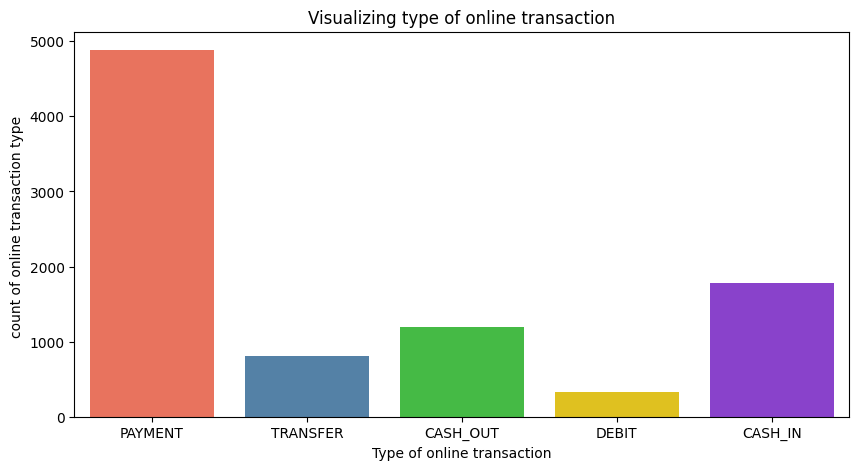

In [435]:
#visualize type of online transaction
plt.figure(figsize=(10,5))
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']
sns.countplot (x="type", data= Data ,hue='type' ,palette=custom_palette)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

In [436]:
type = Data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(Data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

<Axes: xlabel='isFraud', ylabel='count'>

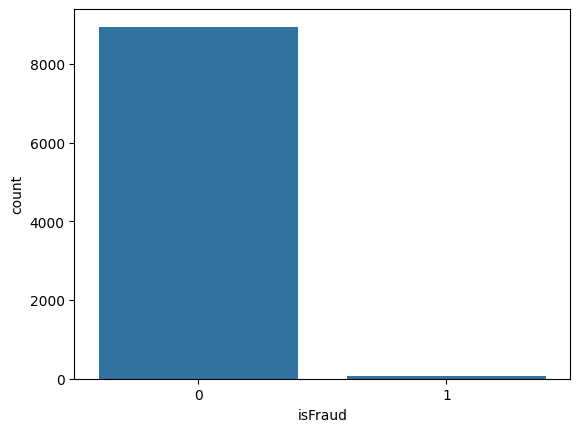

In [437]:
sns.countplot(x = Data['isFraud'])

In [438]:
Data['type'] = Data['type'].map({'PAYMENT':1, 'CASH_IN':2, 'CASH_OUT':3, 'TRANSFER':4, 'DEBIT':5 })

# making prediction using the random variable for train and test

In [439]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [440]:
Data = Data.drop(['nameOrig', 'nameDest'], axis=1)

In [441]:
Data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [442]:
le = LabelEncoder()
Data['type'] = le.fit_transform(Data['type'])

In [443]:
x = np.array(Data[['type','amount','oldbalanceOrg','newbalanceOrig']])
y = np.array(Data[['isFraud']])

In [444]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [445]:
x_train.shape

(7206, 4)

In [446]:
# Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [447]:
# Predicting on the test set
y_pred = rf_model.predict(x_test)

In [448]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 99.50%
Confusion Matrix:
[[1783    3]
 [   6   10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1786
           1       0.77      0.62      0.69        16

    accuracy                           1.00      1802
   macro avg       0.88      0.81      0.84      1802
weighted avg       0.99      1.00      0.99      1802



## New input for prediction using this model

In [449]:
# Payment:1,Cash_in:2,Cash_out:3,Transfer:4,Debit:5
feature = np.array([[4,10565.00,10565.00,0.00]])  # Predict fraud (0: not fraud, 1: fraud)
rf_model.predict(feature)

array([1])

# Model Evalution

In [450]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [451]:
accuracy_score(y_test,y_pred)*100

99.50055493895672

97.50% accuracy but this due to maybe highly imbalanced dataset

### Confusion Matrix

<Axes: >

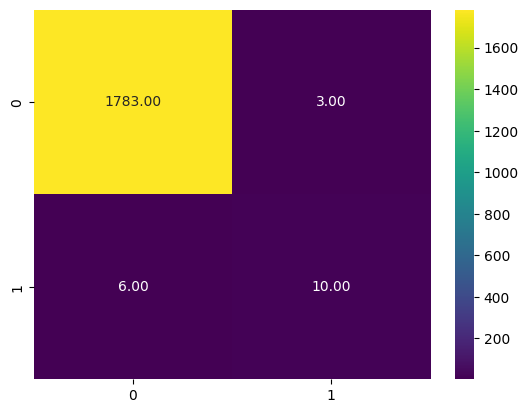

In [452]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap = 'viridis', fmt = '.2f')